<a href="https://colab.research.google.com/github/19PA1A0474/shannu-baby/blob/main/medical_insurance_premium_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Health Insurance Premium Prediction using Python**

In [77]:
import numpy as np
import pandas as pd
data = pd.read_csv("Health_insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Understanding the data

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [79]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Get counts of categorical Variables

In [80]:
data[['sex']].value_counts()

sex   
male      676
female    662
dtype: int64

In [81]:
data[['smoker']].value_counts()

smoker
no        1064
yes        274
dtype: int64

In [82]:
data[['region']].value_counts()

region   
southeast    364
northwest    325
southwest    325
northeast    324
dtype: int64

In [83]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [84]:
#get shape of the dataframe
data.shape

(1338, 7)

Get encoding of categorical features

In [85]:
data.replace({'sex':{'male':0,'female':1}},inplace=True)

In [86]:
data.replace({'smoker':{'no':0,'yes':1}},inplace=True)

In [87]:
data.replace({'region':{'northwest':0,'northeast':1,'southwest':2,'southeast':3}},inplace=True)

In [88]:
#rename the column(optional)
data.rename(columns={'charges':'premium'},inplace=True)
print(data.head())

   age  sex     bmi  children  smoker  region      premium
0   19    1  27.900         0       1       2  16884.92400
1   18    0  33.770         1       0       3   1725.55230
2   28    0  33.000         3       0       3   4449.46200
3   33    0  22.705         0       0       0  21984.47061
4   32    0  28.880         0       0       0   3866.85520


In [89]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
premium     0
dtype: int64

# define independent(target) variable

In [90]:
y=data['premium']
y.shape

(1338,)

# defining X (independent variable or features)

In [91]:
x=data.drop(['premium'],axis=True)

In [92]:
x.shape

(1338, 6)

In [93]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,2
1,18,0,33.770,1,0,3
2,28,0,33.000,3,0,3
3,33,0,22.705,0,0,0
4,32,0,28.880,0,0,0
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0
1334,18,1,31.920,0,0,1
1335,18,1,36.850,0,0,3
1336,21,1,25.800,0,0,2


## Get X variables standardized
standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn.
StandardScaler comes into play when the characteristics of the input dataset differ greatly between their ranges, or simply when they are measured in different units of measure.

StandardScaler comes into play when the characteristics of the input dataset differ greatly between their ranges, or simply when they are measured in different units of measure.

In [94]:
from sklearn.preprocessing import StandardScaler

In [95]:
scalar=StandardScaler()

In [96]:
x_std = data[['age','bmi']]

In [97]:
x_std = scalar.fit_transform(x_std)

In [98]:
x_std

array([[-1.43876426, -0.45332   ],
       [-1.50996545,  0.5096211 ],
       [-0.79795355,  0.38330685],
       ...,
       [-1.50996545,  1.0148781 ],
       [-1.29636188, -0.79781341],
       [ 1.55168573, -0.26138796]])

In [99]:
x[['age','bmi']] = pd.DataFrame(x_std, columns=['age', 'bmi'])

In [100]:
x

,age,sex,bmi,children,smoker,region
0,-1.438764,1,-0.453320,0,1,2
1,-1.509965,0,0.509621,1,0,3
2,-0.797954,0,0.383307,3,0,3
3,-0.441948,0,-1.305531,0,0,0
4,-0.513149,0,-0.292556,0,0,0
...,...,...,...,...,...,...
1333,0.768473,0,0.050297,3,0,0
1334,-1.509965,1,0.206139,0,0,1
1335,-1.509965,1,1.014878,0,0,3
1336,-1.296362,1,-0.797813,0,0,2


# **Get Train Test Split**

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [103]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

# Get Model Training

In [104]:
from sklearn.ensemble import RandomForestRegressor

In [105]:
rfr = RandomForestRegressor(random_state=42)

In [106]:
rfr.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

# Get Model Prediction

In [107]:
y_pred = rfr.predict(x_test)
y_pred.shape

(268,)

In [108]:
y_pred

array([ 9946.6266362 ,  5615.554125  , 28251.191676  , 12137.8284911 ,
       34606.3924927 ,  8690.0195655 ,  2183.951359  , 14844.0127309 ,
        5805.1726381 , 10885.2168089 , 19973.8298508 ,  7244.377544  ,
        4117.1829255 , 45946.9692468 , 48486.8027999 , 45389.5919697 ,
        9838.6592185 , 43351.2492101 ,  9103.6713161 , 24534.9074748 ,
        7902.1901563 , 10810.1803743 ,  1874.9239136 ,  2403.4254498 ,
       12157.0675599 , 11873.852299  , 12937.1178195 ,  8492.9184354 ,
       10486.0671214 ,  6479.92887916,  8230.6876711 , 11752.9656225 ,
        3305.2505218 ,  6041.2955706 ,  3244.1818312 , 10002.2835763 ,
        2561.2889585 ,  8303.4476732 , 23730.085188  , 39253.1638925 ,
        5020.5763293 ,  3391.4989115 , 11794.2628964 , 16515.5507746 ,
        6199.8533426 , 13556.2086578 , 14459.7459481 ,  7234.0554068 ,
       42163.1260162 ,  7675.591199  , 13906.320685  ,  2765.324988  ,
        7108.8341455 ,  1908.92367165, 13361.9562268 , 11096.4873468 ,
      

### Get Model Evaluation

In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [67]:
mean_squared_error(y_test,y_pred)

20720826.100280654

In [68]:
mean_absolute_error(y_test,y_pred)

2506.070737834205

In [69]:
r2_score(y_test,y_pred)

0.8665314305554978

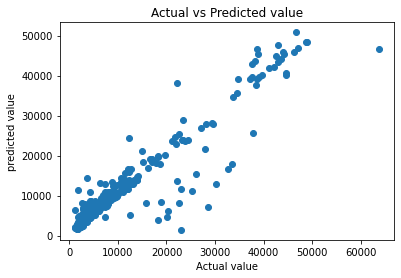

In [70]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual value")
plt.ylabel("predicted value")
plt.title("Actual vs Predicted value")
plt.show()

# Get Future Predictions
**Lets select a sample as new value**
  Steps to follow
 1. Define X as numpy array [ 22 , 0 , 39.5 , 0 , 0 , 2 ]
 2. Age 22 after standardization is -1.22516069
 3. BMI after standardization is 1.44959597
 4. y actual is 1683
 5. Predict

In [72]:
x_new = np.array ( [ - 1.22516869 , 8 , 1.44959597 , 0 , 0 , 2 ] )
X_new = x_new.reshape ( -1,6 )
X_new.shape

(1, 6)

In [73]:
y_pred_new = rfr.predict(X_new)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



In [74]:
y_pred_new

array([2108.65477783])